# Практика

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline
from itertools import product
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
    self.io

AttributeError: _ARRAY_API not found

AttributeError: module 'matplotlib.cm' has no attribute 'register_cmap'

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

_Ответ: 0.5_

In [2]:
import random

def toss_coins():
    return (random.choice(['Орёл', 'Решка']), random.choice(['Орёл', 'Решка']))

def are_different(side1, side2):
    return side1 != side2

n = 100000
successful_count = 0

for i in range(n):
    sides = toss_coins()
    
    if are_different(*sides):
        successful_count += 1

probability = successful_count/n
print(f'{probability: .3f}')

 0.503


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}

_Ответы:  0.125, 0.375, 0.5_

In [3]:
def toss_coin():
    """Функция подбрасывания 1 монеты"""
    return random.choice(['Орел','Решка'])

def throw_three_coins():
    """Функция подбрасывания 3х монет"""
    return tuple(toss_coin() for i in range(3))

def event_A(result):
    return all(x == 'Решка' for x in result)

def event_B(result):
    count_germs = sum(x =='Орел' for x in result)
    return count_germs%2 == 0 and count_germs != 0

def event_C(result):
    return result[2] == 'Орел'

def experiment():
    result = throw_three_coins()
    return {'A': event_A(result), 'B': event_B(result), 'C': event_C(result)}

def main():
    n = 100000
    results = []
    
    for i in range(n):
        results.append(experiment())
    
    elementary_events = set([tuple(toss_coin() for i in range(3)) for i in range(n)])
    print('Множество элементарных событий:\n', elementary_events)
    
    
    counts = {}
    for res in results:
        for key in ['A', 'B', 'C']:
            if res[key]:
                counts[key] = counts.get(key, 0) + 1
    
    print("Вероятность событий:")
    for key in ['A', 'B', 'C']:
        p = counts[key] / n
        print (f'{key}: {p: .3f}')
        

if __name__ == '__main__':
    main()

Множество элементарных событий:
 {('Решка', 'Орел', 'Орел'), ('Орел', 'Орел', 'Решка'), ('Решка', 'Решка', 'Орел'), ('Орел', 'Решка', 'Решка'), ('Орел', 'Орел', 'Орел'), ('Орел', 'Решка', 'Орел'), ('Решка', 'Орел', 'Решка'), ('Решка', 'Решка', 'Решка')}
Вероятность событий:
A:  0.125
B:  0.377
C:  0.500


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}

_Ответы: 0.26, 0.26_

In [4]:
def toss_pretender():
    """Функция выбора претендента"""
    return random.choice(['E','L', 'None'])

def throw_three_pretender():
    """Функция выбора претендентов 3мя членами комиссии"""
    return tuple(toss_pretender() for i in range(3))

def event_A(result):
    count_choice = sum(x =='L' for x in result)
    return count_choice >= 2

def event_B(result):
    count_choice = sum(x =='E' for x in result)
    return count_choice >= 2

def experiment():
    result = throw_three_pretender()
    return {'A': event_A(result),'B': event_B(result)}

def main():
    n = 100000
    results = []
    
    for i in range(n):
        results.append(experiment())
    
    elementary_events = set([tuple(toss_pretender() for i in range(3)) for i in range(n)])
    print('Множество элементарных событий:\n', elementary_events)
    
    
    counts = {}
    for res in results:
        for key in ['A', 'B']:
            if res[key]:
                counts[key] = counts.get(key, 0) + 1
    
    #print("Вероятность событий:")
    for key in ['A', 'B']:
        p = counts[key] / n
        print (f'{key}: {p: .3f}')
        

if __name__ == '__main__':
    main()

Множество элементарных событий:
 {('None', 'None', 'E'), ('E', 'L', 'None'), ('L', 'None', 'E'), ('None', 'None', 'L'), ('L', 'None', 'L'), ('E', 'L', 'E'), ('E', 'L', 'L'), ('E', 'E', 'None'), ('E', 'E', 'E'), ('E', 'E', 'L'), ('L', 'L', 'None'), ('E', 'None', 'None'), ('None', 'E', 'L'), ('None', 'L', 'None'), ('L', 'L', 'E'), ('E', 'None', 'E'), ('L', 'L', 'L'), ('None', 'L', 'E'), ('E', 'None', 'L'), ('None', 'L', 'L'), ('L', 'E', 'None'), ('None', 'E', 'None'), ('L', 'None', 'None'), ('None', 'None', 'None'), ('None', 'E', 'E'), ('L', 'E', 'E'), ('L', 'E', 'L')}
A:  0.260
B:  0.260


### Задача 4 + Задача 5
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

D = {выпала хотя бы одна шестёрка}

_Ответы (не забывайте о множестве элементарных событий): 0.028, 0.083, 0.7, 0.305_

In [6]:
def roll_two_dice():
    return (random.randint(1, 6), random.randint(1, 6))
#событие А
def event_A(roll):
    return roll[0] == 6 and roll[1] == 6

#событие B
def event_B(roll):
    return (roll[0] + roll[1] >= 11)

#событие C
def event_C(roll):
    return (roll[0] != 6 and roll[1] != 6)

#событие D из задачи 5
def event_D(roll):
    return (roll[0] == 6 or roll[1] == 6)

def experiment():
    roll = roll_two_dice()
    return {'A': event_A(roll),'B': event_B(roll), 'C': event_C(roll), 'D': event_D(roll)}

def main():
    n = 100000
    results = []
    
    for i in range(n):
        results.append(experiment())
    
    elementary_events = set([tuple(roll_two_dice()) for i in range(n)])
    print('Множество элементарных событий: ', elementary_events)
    
    counts = {}
    for res in results:
        for key in ['A', 'B', 'C', 'D']:
            if res[key]:
                counts[key] = counts.get(key, 0) + 1
    
    print("Вероятность событий:")
    for key in ['A', 'B', 'C', 'D']:
        p = counts[key] / n
        print (f'{key}: {p: .3f}')
        

if __name__ == '__main__':
    main()

Множество элементарных событий:  {(3, 4), (4, 3), (3, 1), (5, 4), (4, 6), (5, 1), (2, 2), (1, 6), (2, 5), (1, 3), (6, 2), (6, 5), (4, 2), (4, 5), (3, 3), (5, 6), (3, 6), (5, 3), (2, 4), (1, 2), (2, 1), (1, 5), (6, 1), (6, 4), (3, 2), (4, 1), (3, 5), (5, 2), (4, 4), (5, 5), (1, 1), (1, 4), (2, 3), (2, 6), (6, 6), (6, 3)}
Вероятность событий:
A:  0.027
B:  0.082
C:  0.697
D:  0.303


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}

_Ответ: 0.305_

# Задача 5 была объединена с задачей 4

Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}

_Ответы: 0.72, 0.01, 0.28, 0.99_

In [7]:
def roll_three_digits():
    return (random.randint(0, 9), random.randint(0, 9), random.randint(0, 9))

def event_A(roll):
    return (roll[0] != roll[1] and roll[1] != roll[2] and roll[0] != roll[2])

def event_B(roll):
    return (roll[0] == roll[1] and roll[1] == roll[2] and roll[0] == roll[2])

def event_C(roll):
    return (roll[0] == roll[1] or roll[1] == roll[2] or roll[0] == roll[2])

def event_D(roll):
    return (roll[0] != roll[1] or roll[1] != roll[2] or roll[0] != roll[2])

def experiment():
    roll = roll_three_digits()
    return {'A': event_A(roll), 'B': event_B(roll), 'C': event_C(roll), 'D': event_D(roll)}

def main():
    n = 1000000
    results = []
    
    for i in range(n):
        results.append(experiment())
    
    counts = {}
    for res in results:
        for key in ['A', 'B', 'C', 'D']:
            if res[key]:
                counts[key] = counts.get(key, 0) + 1
    
    print("Вероятность событий:")
    for key in ['A', 'B', 'C', 'D']:
        p = counts[key] / n
        print (f'{key}: {p: .2f}')
        

if __name__ == '__main__':
    main()

Вероятность событий:
A:  0.72
B:  0.01
C:  0.28
D:  0.99


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

_Ответ: закон распределения данной величины_

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

_Ответ: закон распределения случайной величины , вероятности событий  𝑋<=4 и 𝑋>4_

In [12]:
def roll_two_dice():
    return (random.randint(1, 6), random.randint(1, 6))
#событие А
def event_A(roll):
    return (roll[0] + roll[1]) <= 4

#событие B
def event_B(roll):
    return (roll[0] + roll[1] > 4)

def experiment():
    roll = roll_two_dice()
    return {'A': event_A(roll),'B': event_B(roll)}

def main():
    n = 100000
    results = []
    
    for i in range(n):
        results.append(experiment())
    
    counts = {}
    for res in results:
        for key in ['A', 'B']:
            if res[key]:
                counts[key] = counts.get(key, 0) + 1
    
    print("Вероятность событий:")
    for key in ['A', 'B']:
        p = counts[key] / n
        print (f'{key}: {p: .3f}')
        

if __name__ == '__main__':
    main()

Вероятность событий:
A:  0.167
B:  0.833


[]

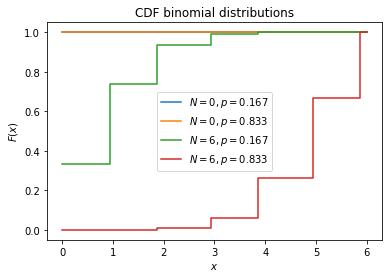

In [41]:
import scipy.stats as sts
from itertools import product
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.linspace(0,6,46)
for N, p in product([0,6], [.167,.833]):
    rv = sts.binom(N, p)
    cdf = rv.cdf(x)
    plt.step(x, cdf, label="$N=%s, p=%s$" % (N,p))
plt.legend()
plt.title("CDF binomial distributions")
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

[]

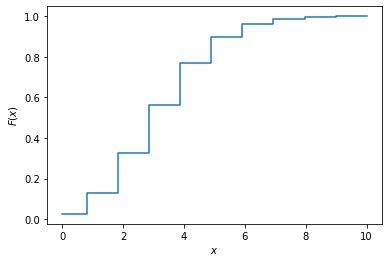

In [24]:
binomial_rv = sts.binom(20, 0.167) # 20 испытаний с вероятностью успеха 0.167
# построим функцию распределения
x = np.linspace(0,10)
cdf = binomial_rv.cdf(x) # вернёт массив из значений функции распределения
plt.step(x, cdf)
plt.ylabel("$F(x)$")
plt.xlabel("$x$")
plt.plot()

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.

_Ответы: .0127, 0.0008_

In [43]:
def draw_two_cards():
    diamonds = ['6d', '7d','8d', '9d', '10d', 'Jd', 'Qd', 'Kd', 'Ad']
    hearts = ['6h', '7h','8h', '9h', '10h', 'Jh', 'Qh', 'Kh', 'Ah']
    clubs = ['6c', '7c','8c', '9c', '10c', 'Jc', 'Qc', 'Kc', 'Ac']
    spades = ['6s', '7s','8s', '9s', '10s', 'Js', 'Qs', 'Ks', 'As']
    deck = diamonds + hearts + clubs + spades
    first_card = random.choice(deck)
    second_card = random.choice(deck)
    return first_card, second_card

def is_target_outcome(first_card, second_card):
    return (first_card[0] == '6' and second_card[0] == '7')

def is_both_hearts(first_card, second_card):
    return first_card[1] == 'd' and second_card[1] == 'd'

n = 100000
target_outcomes = 0
both_hearts_outcomes = 0

for i in range(n):
    first_card, second_card = draw_two_cards()
    if is_target_outcome(first_card, second_card):
        target_outcomes += 1
    if is_both_hearts(first_card, second_card):
        both_hearts_outcomes += 1

print(f'Вероятность: {target_outcomes/n:.4f}')
print(f'Условная вероятность: {(target_outcomes/both_hearts_outcomes):.4f}')

Вероятность: 0.0125
Условная вероятность: 0.2517


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

_Ответы: 0.1, 0.24_

In [44]:
import random

def draw_balls():
    urn = ['white']*2 + ['black']*3
    first_ball = random.choice(urn)
    if first_ball == 'black':
        urn.remove('black')
        urn.append('white')
    else:
        urn.remove('white')
    second_ball = random.choice(urn)
    return first_ball, second_ball

def is_white_white():
    return draw_balls() == ('white', 'white')

def is_black_black():
    return draw_balls() == ('black', 'black')

n = 100000

def main():
    white_white_count = 0
    black_black_count = 0
    
    for i in range(n):
        if is_white_white():
            white_white_count += 1
        if is_black_black():
            black_black_count += 1 
            
    print(f'Вероятность выпадения двух белых шаров: {white_white_count/n:.2f}')
    print(f'Вероятность выпадения двух черных шаров: {black_black_count/n:.2f}')
    
    
if __name__ == '__main__':
    main()

Вероятность выпадения двух белых шаров: 0.10
Вероятность выпадения двух черных шаров: 0.24
